In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping


In [2]:
df=pd.read_csv("Resources/Data/movies.csv")
df["like_count%"]=df["like_count"]/df["view_count"]
df["comment_count%"]=df["comment_count"]/df["view_count"]
df=df.replace([np.inf, -np.inf], np.nan)
df=df[df["gross"]!=0]
df.isnull().sum(axis = 0)

movie             0
budge             0
gross             0
comment_count     0
view_count        0
like_count        0
year              0
like_count%       0
comment_count%    0
dtype: int64

In [3]:
dataset=df.copy()
dataset.head()
dataset.head()
dataset["profit"]=dataset["gross"]-dataset["budge"]
df.head()
# X=dataset.iloc[:,[1,3,4,5]]
def posneg(x):
    if x>=0:
        return 1
    else:
        return 0
# y=dataset.iloc[:,[2]]
dataset["profit"]=dataset["profit"].apply(posneg)  


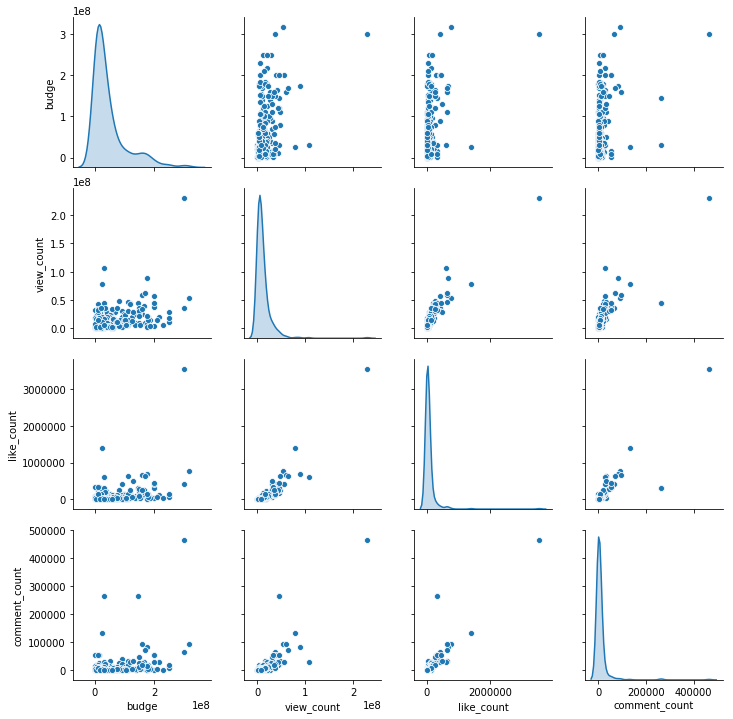

In [4]:
X=dataset.iloc[:,[1,3,4,5,7,8]]
# X=dataset.iloc[:,[1,3,4,5]]

y=dataset.iloc[:,[9]]
# y=dataset.iloc[:,[7]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()

#check distribution of this dataset

In [5]:
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

#check nan values

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)


1.0

In [7]:
rf.score(X_test, y_test)


0.5793650793650794

In [8]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [9]:
model = Sequential()
model.add(Dense(units=6, activation='selu', input_dim=6))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='selu'))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='softmax'))

W0801 18:04:11.030776 17600 deprecation.py:506] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 18:04:11.057760 17600 deprecation.py:323] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fit the model to the training data
k=model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
376/376 - 0s - loss: 0.7183 - acc: 0.5612
Epoch 2/1000
376/376 - 0s - loss: 0.6938 - acc: 0.5798
Epoch 3/1000
376/376 - 0s - loss: 0.6775 - acc: 0.6090
Epoch 4/1000
376/376 - 0s - loss: 0.6854 - acc: 0.5878
Epoch 5/1000
376/376 - 0s - loss: 0.6778 - acc: 0.5824
Epoch 6/1000
376/376 - 0s - loss: 0.6858 - acc: 0.5878
Epoch 7/1000
376/376 - 0s - loss: 0.7098 - acc: 0.5239
Epoch 8/1000
376/376 - 0s - loss: 0.6920 - acc: 0.5798
Epoch 9/1000
376/376 - 0s - loss: 0.6699 - acc: 0.5904
Epoch 10/1000
376/376 - 0s - loss: 0.6820 - acc: 0.5665
Epoch 11/1000
376/376 - 0s - loss: 0.6710 - acc: 0.5984
Epoch 12/1000
376/376 - 0s - loss: 0.6684 - acc: 0.5851
Epoch 13/1000
376/376 - 0s - loss: 0.6763 - acc: 0.5771
Epoch 14/1000
376/376 - 0s - loss: 0.6776 - acc: 0.6037
Epoch 15/1000
376/376 - 0s - loss: 0.6906 - acc: 0.5638
Epoch 16/1000
376/376 - 0s - loss: 0.6618 - acc: 0.6197
Epoch 17/1000
376/376 - 0s - loss: 0.6740 - acc: 0.5984
Epoch 18/1000
376/376 - 0s - loss: 0.6605 - acc: 0.5904
E

Epoch 147/1000
376/376 - 0s - loss: 0.6476 - acc: 0.6223
Epoch 148/1000
376/376 - 0s - loss: 0.6250 - acc: 0.6649
Epoch 149/1000
376/376 - 0s - loss: 0.6371 - acc: 0.6516
Epoch 150/1000
376/376 - 0s - loss: 0.6441 - acc: 0.6356
Epoch 151/1000
376/376 - 0s - loss: 0.6508 - acc: 0.6489
Epoch 152/1000
376/376 - 0s - loss: 0.6443 - acc: 0.6383
Epoch 153/1000
376/376 - 0s - loss: 0.6572 - acc: 0.6064
Epoch 154/1000
376/376 - 0s - loss: 0.6514 - acc: 0.6463
Epoch 155/1000
376/376 - 0s - loss: 0.6454 - acc: 0.6463
Epoch 156/1000
376/376 - 0s - loss: 0.6333 - acc: 0.6410
Epoch 157/1000
376/376 - 0s - loss: 0.6361 - acc: 0.6356
Epoch 158/1000
376/376 - 0s - loss: 0.6496 - acc: 0.6250
Epoch 159/1000
376/376 - 0s - loss: 0.6421 - acc: 0.6383
Epoch 160/1000
376/376 - 0s - loss: 0.6515 - acc: 0.6303
Epoch 161/1000
376/376 - 0s - loss: 0.6543 - acc: 0.6330
Epoch 162/1000
376/376 - 0s - loss: 0.6491 - acc: 0.6117
Epoch 163/1000
376/376 - 0s - loss: 0.6336 - acc: 0.6197
Epoch 164/1000
376/376 - 0s - l

Epoch 291/1000
376/376 - 0s - loss: 0.6402 - acc: 0.6410
Epoch 292/1000
376/376 - 0s - loss: 0.6399 - acc: 0.6330
Epoch 293/1000
376/376 - 0s - loss: 0.6417 - acc: 0.6383
Epoch 294/1000
376/376 - 0s - loss: 0.6429 - acc: 0.6410
Epoch 295/1000
376/376 - 0s - loss: 0.6293 - acc: 0.6649
Epoch 296/1000
376/376 - 0s - loss: 0.6296 - acc: 0.6649
Epoch 297/1000
376/376 - 0s - loss: 0.6278 - acc: 0.6410
Epoch 298/1000
376/376 - 0s - loss: 0.6461 - acc: 0.6383
Epoch 299/1000
376/376 - 0s - loss: 0.6350 - acc: 0.6543
Epoch 300/1000
376/376 - 0s - loss: 0.6457 - acc: 0.6356
Epoch 301/1000
376/376 - 0s - loss: 0.6393 - acc: 0.6436
Epoch 302/1000
376/376 - 0s - loss: 0.6504 - acc: 0.6303
Epoch 303/1000
376/376 - 0s - loss: 0.6296 - acc: 0.6596
Epoch 304/1000
376/376 - 0s - loss: 0.6400 - acc: 0.6383
Epoch 305/1000
376/376 - 0s - loss: 0.6234 - acc: 0.6649
Epoch 306/1000
376/376 - 0s - loss: 0.6316 - acc: 0.6436
Epoch 307/1000
376/376 - 0s - loss: 0.6405 - acc: 0.6436
Epoch 308/1000
376/376 - 0s - l

Epoch 435/1000
376/376 - 0s - loss: 0.6244 - acc: 0.6755
Epoch 436/1000
376/376 - 0s - loss: 0.6044 - acc: 0.6622
Epoch 437/1000
376/376 - 0s - loss: 0.6261 - acc: 0.6676
Epoch 438/1000
376/376 - 0s - loss: 0.6225 - acc: 0.6729
Epoch 439/1000
376/376 - 0s - loss: 0.6302 - acc: 0.6649
Epoch 440/1000
376/376 - 0s - loss: 0.6003 - acc: 0.6835
Epoch 441/1000
376/376 - 0s - loss: 0.6174 - acc: 0.6596
Epoch 442/1000
376/376 - 0s - loss: 0.6302 - acc: 0.6702
Epoch 443/1000
376/376 - 0s - loss: 0.6301 - acc: 0.6622
Epoch 444/1000
376/376 - 0s - loss: 0.6254 - acc: 0.6489
Epoch 445/1000
376/376 - 0s - loss: 0.6466 - acc: 0.6303
Epoch 446/1000
376/376 - 0s - loss: 0.6262 - acc: 0.6782
Epoch 447/1000
376/376 - 0s - loss: 0.6391 - acc: 0.6303
Epoch 448/1000
376/376 - 0s - loss: 0.6232 - acc: 0.6729
Epoch 449/1000
376/376 - 0s - loss: 0.6219 - acc: 0.6676
Epoch 450/1000
376/376 - 0s - loss: 0.6200 - acc: 0.6596
Epoch 451/1000
376/376 - 0s - loss: 0.6453 - acc: 0.6649
Epoch 452/1000
376/376 - 0s - l

Epoch 579/1000
376/376 - 0s - loss: 0.6119 - acc: 0.6702
Epoch 580/1000
376/376 - 0s - loss: 0.6413 - acc: 0.6569
Epoch 581/1000
376/376 - 0s - loss: 0.6135 - acc: 0.6941
Epoch 582/1000
376/376 - 0s - loss: 0.6247 - acc: 0.6622
Epoch 583/1000
376/376 - 0s - loss: 0.6328 - acc: 0.6649
Epoch 584/1000
376/376 - 0s - loss: 0.6195 - acc: 0.6676
Epoch 585/1000
376/376 - 0s - loss: 0.6241 - acc: 0.6569
Epoch 586/1000
376/376 - 0s - loss: 0.6172 - acc: 0.6649
Epoch 587/1000
376/376 - 0s - loss: 0.6299 - acc: 0.6676
Epoch 588/1000
376/376 - 0s - loss: 0.6296 - acc: 0.6543
Epoch 589/1000
376/376 - 0s - loss: 0.6194 - acc: 0.6835
Epoch 590/1000
376/376 - 0s - loss: 0.6289 - acc: 0.6543
Epoch 591/1000
376/376 - 0s - loss: 0.6291 - acc: 0.6277
Epoch 592/1000
376/376 - 0s - loss: 0.6291 - acc: 0.6702
Epoch 593/1000
376/376 - 0s - loss: 0.6170 - acc: 0.6569
Epoch 594/1000
376/376 - 0s - loss: 0.6245 - acc: 0.6729
Epoch 595/1000
376/376 - 0s - loss: 0.6236 - acc: 0.6676
Epoch 596/1000
376/376 - 0s - l

Epoch 723/1000
376/376 - 0s - loss: 0.6296 - acc: 0.6489
Epoch 724/1000
376/376 - 0s - loss: 0.6401 - acc: 0.6436
Epoch 725/1000
376/376 - 0s - loss: 0.6231 - acc: 0.6463
Epoch 726/1000
376/376 - 0s - loss: 0.6397 - acc: 0.6463
Epoch 727/1000
376/376 - 0s - loss: 0.6202 - acc: 0.6596
Epoch 728/1000
376/376 - 0s - loss: 0.6257 - acc: 0.6676
Epoch 729/1000
376/376 - 0s - loss: 0.6030 - acc: 0.6782
Epoch 730/1000
376/376 - 0s - loss: 0.6288 - acc: 0.6755
Epoch 731/1000
376/376 - 0s - loss: 0.6165 - acc: 0.6596
Epoch 732/1000
376/376 - 0s - loss: 0.6163 - acc: 0.6729
Epoch 733/1000
376/376 - 0s - loss: 0.6327 - acc: 0.6676
Epoch 734/1000
376/376 - 0s - loss: 0.6080 - acc: 0.6729
Epoch 735/1000
376/376 - 0s - loss: 0.6303 - acc: 0.6516
Epoch 736/1000
376/376 - 0s - loss: 0.6343 - acc: 0.6489
Epoch 737/1000
376/376 - 0s - loss: 0.6178 - acc: 0.6649
Epoch 738/1000
376/376 - 0s - loss: 0.6260 - acc: 0.6596
Epoch 739/1000
376/376 - 0s - loss: 0.6338 - acc: 0.6303
Epoch 740/1000
376/376 - 0s - l

Epoch 867/1000
376/376 - 0s - loss: 0.6235 - acc: 0.6729
Epoch 868/1000
376/376 - 0s - loss: 0.6099 - acc: 0.6809
Epoch 869/1000
376/376 - 0s - loss: 0.6095 - acc: 0.6702
Epoch 870/1000
376/376 - 0s - loss: 0.6176 - acc: 0.6649
Epoch 871/1000
376/376 - 0s - loss: 0.6248 - acc: 0.6569
Epoch 872/1000
376/376 - 0s - loss: 0.6087 - acc: 0.6676
Epoch 873/1000
376/376 - 0s - loss: 0.6308 - acc: 0.6489
Epoch 874/1000
376/376 - 0s - loss: 0.6328 - acc: 0.6622
Epoch 875/1000
376/376 - 0s - loss: 0.6316 - acc: 0.6569
Epoch 876/1000
376/376 - 0s - loss: 0.6218 - acc: 0.6676
Epoch 877/1000
376/376 - 0s - loss: 0.6145 - acc: 0.6729
Epoch 878/1000
376/376 - 0s - loss: 0.6264 - acc: 0.6489
Epoch 879/1000
376/376 - 0s - loss: 0.6159 - acc: 0.6569
Epoch 880/1000
376/376 - 0s - loss: 0.6409 - acc: 0.6383
Epoch 881/1000
376/376 - 0s - loss: 0.6291 - acc: 0.6782
Epoch 882/1000
376/376 - 0s - loss: 0.6291 - acc: 0.6569
Epoch 883/1000
376/376 - 0s - loss: 0.6085 - acc: 0.6516
Epoch 884/1000
376/376 - 0s - l

In [12]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 0.5659 - acc: 0.7381
Deep Neural Network - Loss: 0.5658571020005241, Accuracy: 0.738095223903656


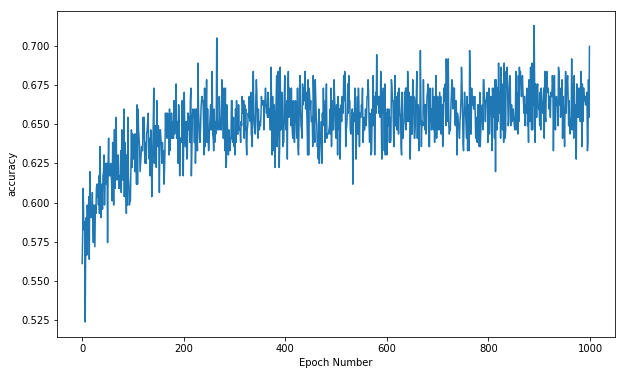

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel('Epoch Number')
plt.ylabel("accuracy")

plt.plot(k.history['acc'])

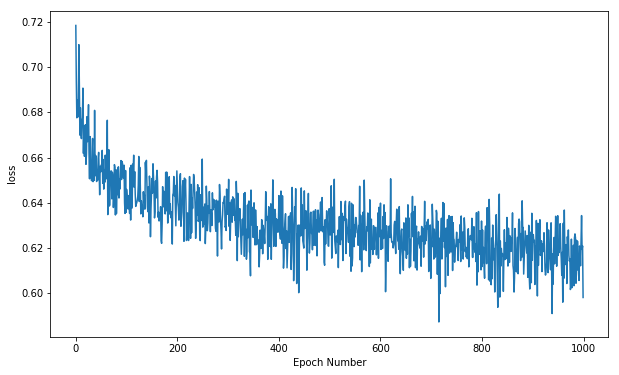

In [14]:
plt.figure(figsize=(10,6))

plt.xlabel('Epoch Number')
plt.ylabel("loss")

plt.plot(k.history['loss'])

In [15]:
deepkk=model.predict_classes(X_test_scaled)
y_comp=y_test.copy()
y_comp["profit_predict"]=deepkk
y_comp.head()

,profit,profit_predict
12,0,0
10,1,1
345,1,1
482,1,0
395,0,0


In [16]:
zz=(y_comp["profit"]==y_comp["profit_predict"]).sum()/len(deepkk)

In [17]:
print(f"accuracy on test dataset is {round(zz*100,2)}%")

accuracy on test dataset is 73.81%


In [18]:
model.predict_classes(X_test_scaled[0].reshape(-1,1).T)

array([0], dtype=int64)

In [19]:
#userinput

data = []
print(X.iloc[:,[0,1,2,3]].columns)
n = 4
for i in range(0, n):
    x = int(input('Enter the value in order: '))
    data.append(x)
data.append(data[3]/data[2])
data.append(data[1]/data[2])

Index(['budge', 'comment_count', 'view_count', 'like_count'], dtype='object')
Enter the value in order: 150000
Enter the value in order: 15000
Enter the value in order: 1500
Enter the value in order: 1


In [20]:
preview=pd.DataFrame(data).T
preview.columns=X.columns
preview

,budge,comment_count,view_count,like_count,like_count%,comment_count%
0,150000.0,15000.0,1500.0,1.0,0.000667,10.0


In [21]:
#userinput
zzz=model.predict_classes(X_scaler.transform(np.array(data).reshape(-1,1).T))
zzz

array([1], dtype=int64)

In [22]:
if zzz==1:
    print("user input prediction is profitable")
else:
    print("user input prediction is not profitable")

user input prediction is profitable


In [23]:
model.save("movie_model_trained.h5")

In [24]:
from sklearn.externals.joblib import dump, load
dump(X_scaler, 'std_scaler.bin', compress=True)


['std_scaler.bin']

In [25]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
sc=load('std_scaler.bin')


In [27]:
X_train.tail()


,budge,comment_count,view_count,like_count,like_count%,comment_count%
461,10000000.0,8185,14833097,140197,0.009452,0.000552
385,50000000.0,1750,2518967,18308,0.007268,0.000695
263,18000000.0,380,2211401,7133,0.003226,0.000172
114,59000000.0,1888,1981847,12771,0.006444,0.000953
96,30000000.0,1205,6381533,16827,0.002637,0.000189


In [28]:
max(dataset["like_count"])

3553094